In [127]:
import pandas as pd
import seaborn as sns
from nltk import FreqDist
from nltk.corpus import stopwords

In [128]:
dataset = pd.read_csv('dataset.csv')

In [129]:
dataset.dtypes
dataset = dataset.dropna()
dataset

,questions,year,topic
0,The ratio of mass percent of C and H of anorga...,2018.0,alkane
1,Which type of ‘defect’ has the presence ofcati...,2018.0,solid state
2,According to molecular orbital theorywhich of ...,2018.0,chemical_bonding
3,Which of the following lines correctly showthe...,2018.0,chemical_equilibrium
4,The combustion of benzene (l) gives CO2(g)and ...,2018.0,thermodynamics
5,For 1 molal aqueous solution of thefollowing c...,2018.0,solutions
6,An aqueous solution contains 010 M H2Sand 020 ...,2018.0,chemical_equilibrium
7,An aqueous solution contains an unknownconcen...,2018.0,chemical_equilibrium
8,At 5188 C the rate of decomposition of asample...,2018.0,chemical_kinetics
9,How long (approximate) should water beelectrol...,2018.0,electrolysis


In [130]:
# dataset = dataset.astype({'questions' : 'object', 'year' : 'int', 'topic' : 'object'})

In [131]:
dataset.head()
dataset['year'] = dataset['year'].apply(np.int64)
# dataset['year'] = dataset['year'].astype(np.int)

In [132]:
dataset
dataset.dtypes
dataset

,questions,year,topic
0,The ratio of mass percent of C and H of anorga...,2018,alkane
1,Which type of ‘defect’ has the presence ofcati...,2018,solid state
2,According to molecular orbital theorywhich of ...,2018,chemical_bonding
3,Which of the following lines correctly showthe...,2018,chemical_equilibrium
4,The combustion of benzene (l) gives CO2(g)and ...,2018,thermodynamics
5,For 1 molal aqueous solution of thefollowing c...,2018,solutions
6,An aqueous solution contains 010 M H2Sand 020 ...,2018,chemical_equilibrium
7,An aqueous solution contains an unknownconcen...,2018,chemical_equilibrium
8,At 5188 C the rate of decomposition of asample...,2018,chemical_kinetics
9,How long (approximate) should water beelectrol...,2018,electrolysis


In [133]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [134]:
def plot_word_frequency(words, top_n=10):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plot = sns.barplot(labels, counts)
    return plot

In [135]:
words = list(dataset.questions)
string = " ".join(words)
# string = ""
# for word in words:
#     string += word + " "


In [136]:
string

'The ratio of mass percent of C and H of anorganic compound (CXHYOZ) is 6 : 1 Ifone molecule of the above compound(CXHYOZ) contains half as much oxygenas required to burn one molecule ofcompound CXHY completely to CO2 andH2O The empirical formula of compoundCXHYOZ is Which type of ‘defect’ has the presence ofcations in the interstitial sites  According to molecular orbital theorywhich of the following will not be a viable molecule  Which of the following lines correctly showthe temperature dependence ofequilibrium constant  K  for an exothermicreaction  The combustion of benzene (l) gives CO2(g)and H2O(l) Given that heat of combustionof benzene at constant volume is−32639 kJ mol−1 at 258 C; heat ofcombustion (in kJ mol−1) of benzene atconstant pressure will be :(R=8314 JK−1 mol−1) For 1 molal aqueous solution of thefollowing compounds which one willshow the highest freezing point  An aqueous solution contains 010 M H2Sand 020 M HCl If the equilibriumconstants for the formation of HS− f

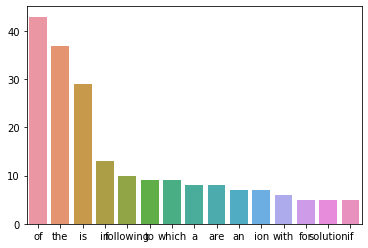

In [137]:
string = string.lower()
plot_words = string.split()
plot_word_frequency(plot_words, 15)

In [138]:
no_stop = [word for word in plot_words if word not in stopwords.words('english')]

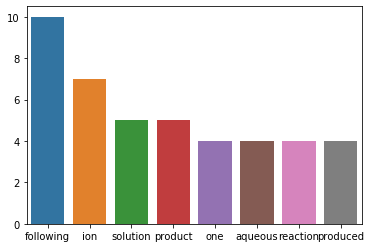

In [140]:
plot_word_frequency(no_stop,8)